#Paquetes necesarios

In [1]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

Carga imagen y convierte a RGB

(938, 473, 3)


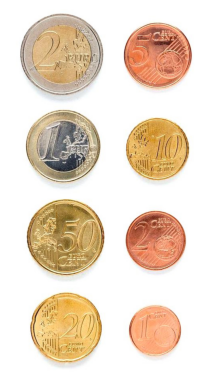

In [12]:
#Carga imagen ejemplo con monedas
img = cv2.imread('Monedas.jpg') 
print(img.shape)
#Recordar que OpenCV lee las imágenes en BGR, por lo que convertimos para visualizr a RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.axis("off")
plt.imshow(img_rgb) 
plt.show()

Convierte a gris y muestra histograma

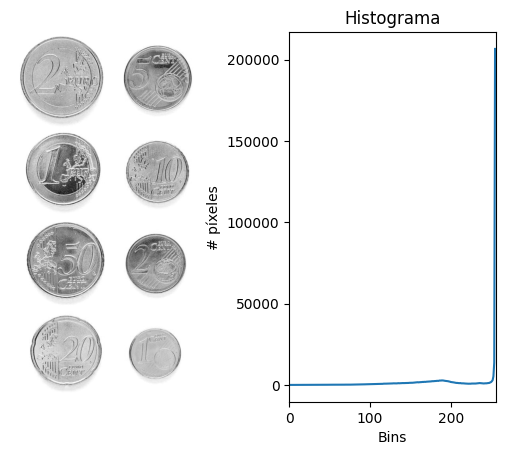

In [17]:
#Convierte la imagen a todos de gris, mostrando el resultado
img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Cálculo del histograma con 256 bins de una imagen en escala de grises
hist = cv2.calcHist(
    [img_gris], # imagen
    [0], # canal
    None, # máscara
    [256], # bins: número de intervalos
    [0, 256] # rango: límites de los intervalos
) 

plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.imshow(img_gris, cmap='gray')

# Histograma sin normalizar
plt.subplot(1, 2, 2)
plt.title("Histograma")
plt.xlabel("Bins")
plt.ylabel("# píxeles")
plt.plot(hist)
plt.xlim([0, 256])

# Separo subplots horizontalmente
plt.subplots_adjust(wspace=0.4)

Cuenta elementos tras umbralizar

Umbral fijo usado  200.0
Umbral Otsu  204.0


Text(0.5, 1.0, 'OTSU invertida')

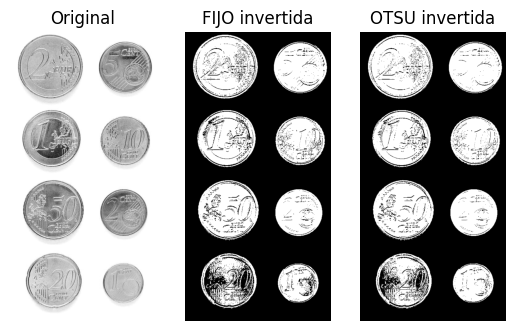

In [36]:
#Dos variantes de umbralizado. Probar otros parámetros, aplicar filtro previo, etc.
umbral = 200 # Prueba varios comenzando en 130

# Umbralizado binario invertido, dado que por defecto se asume objetos en blanco
th1,img_th1 = cv2.threshold(img_gris,umbral,255,cv2.THRESH_BINARY_INV)
print('Umbral fijo usado ', th1)

# Umbralizado con método de Otsu para selección automática del umbral
th2,img_th2 = cv2.threshold(
    img_gris, # imagen
    0, # umbral
    255, # valor máximo
    cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU # método
)
print('Umbral Otsu ', th2)

plt.subplot(1, 3, 1)
plt.axis("off")
plt.imshow(img_gris,cmap='gray') 
plt.title('Original')

plt.subplot(1, 3, 2)
plt.axis("off")
plt.imshow(img_th1,cmap='gray') 
plt.title('FIJO invertida')

plt.subplot(1, 3, 3)
plt.axis("off")
plt.imshow(img_th2,cmap='gray') 
plt.title('OTSU invertida')


Búsqueda de componentes y sus contornos

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


12740.0 600.4995620250702 ((366.5, 815.0), (126.0, 131.0), 90.0) 366.4169616699219 814.4717407226562 65.74199676513672 ((366.64166259765625, 814.06298828125), (125.09832000732422, 130.85784912109375), 86.78424072265625)
24682.5 643.7127649784088 ((141.0, 806.5), (175.0, 180.0), 90.0) 141.45033264160156 807.0255126953125 90.4556655883789 ((141.7595672607422, 807.3490600585938), (175.33294677734375, 179.72752380371094), 83.83692932128906)
17854.5 503.83051443099976 ((368.5, 587.0), (150.0, 151.0), 90.0) 368.2776184082031 586.7313842773438 76.19898223876953 ((368.3255615234375, 586.7984008789062), (150.0564727783203, 151.56260681152344), 91.99696350097656)
29172.5 675.1686074733734 ((140.35000610351562, 577.9500122070312), (195.4287567138672, 191.31777954101562), 18.434947967529297) 140.02484130859375 578.3192749023438 98.17781066894531 ((140.2999725341797, 577.9070434570312), (190.2574005126953, 195.45433044433594), 88.34276580810547)
19355.0 551.6711331605911 ((372.5, 355.0), (156.0, 15

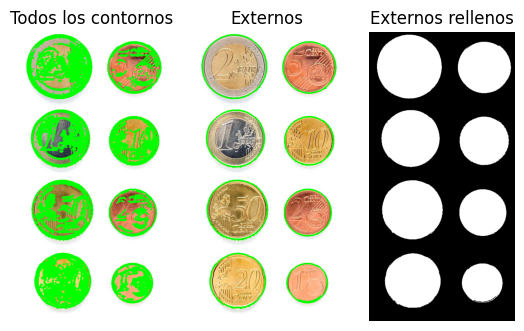

In [35]:
#Localiza contornos en imagen obtenida con umbral fijo
#findContours está diseñada para imágenes con  figura en blanco y fondo negro
#La imagen de entrada debe ser de un canal y 8 bits excepto en los modos RETR_CCOMP o RETR_FLOODFILL
#hierarchy contiene información sobre el nivel del contorno, relaciones paterno-filiales (contornos contenidos en otros)

#Obtiene todos los contornos: externos e internos
contornos, hierarchy = cv2.findContours(
    img_th1, #imagen
    cv2.RETR_TREE, #Modo de recuperación (lista, árbol, nivel superior)
    cv2.CHAIN_APPROX_SIMPLE #Método de aproximación del contorno
)

#Dibuja sobre la imagen de entrada los contornos en verde
#Cada vez que quiere pintar convierte img para no tener restos
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.drawContours(img_rgb, contornos, -1, (0,255,0), 3)

plt.subplot(131)
plt.axis("off")
plt.imshow(img_rgb) 
plt.title('Todos los contornos')

#Obtiene únicamente los contornos externos
contornos2, hierarchy2 = cv2.findContours(
    img_th1, # imagen
    cv2.RETR_EXTERNAL, # Modo de recuperación (lista, árbol, nivel superior)
    cv2.CHAIN_APPROX_SIMPLE # Método de aproximación del contorno
)

#Dibuja sobre la imagen de entrada sólo contornos externos
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.drawContours(img_rgb, contornos2, -1, (0,255,0), 3)

plt.subplot(132)
plt.axis("off")
plt.imshow(img_rgb)
plt.title('Externos')

#Dibuja contornos externos rellenos en imagen vacía
#Imagen negra
img_cont = np.zeros(img_rgb.shape)

#Recorre los contornos externos
for c in contornos2:
    #Área del contorno
    area = cv2.contourArea(c)
    
    #Área mínima (útil filtrar en ocasiones)
    if area > 200:
        #Perímetro del contorno
        perimetro = cv2.arcLength(c,True)
        
        #Contenedor alineado con ejes de la imagen
        x,y,w,h = cv2.boundingRect(c)
        
        #Mínimo contenedor ajustado para el contorno
        rect = cv2.minAreaRect(c)
        
        #Mínimo círculo que contiene al contorno
        (cx,cy),radio = cv2.minEnclosingCircle(c)
        
        #Elipse ajustada al contorno, exgigiendo un mínimo de puntos del contornos
        if c.shape[0] > 5:
            elipse = cv2.fitEllipse(c)
            #Para determinadas tareas nos puede interesará mostrar los valores obtenidos del contorno
            print(area, perimetro, rect, cx, cy,radio, elipse)

        #Dibuja los contornos
        cv2.drawContours(
            img_cont, # imagen
            [c], # contorno
            -1, # -1 para todos. Si se quisiera pintar sólo uno, se pondría el índice
            (255,255,255), # color
            -1 # relleno
        )

plt.subplot(133)
plt.axis("off")
plt.imshow(img_cont) 
plt.title('Externos rellenos')
plt.show()


Alternativa contando círculos utilizando la Transformada de Hough. La selección de parámetros puede ser "divertida", más [información](https://docs.opencv.org/4.x/da/d53/tutorial_py_houghcircles.html)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


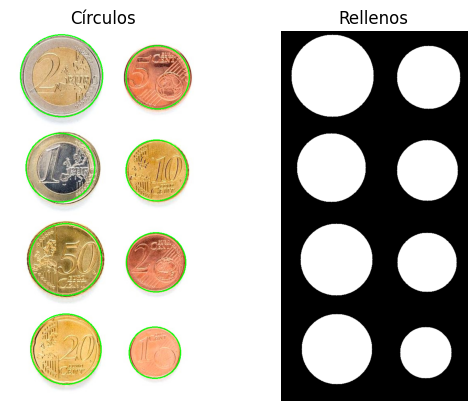

In [7]:
#Conversión a gris
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Suaviza imagen (elimina altas frecuencias)
pimg = cv2.medianBlur(gris, 7)

#Localiza Círculos
circ = cv2.HoughCircles(
        pimg,  # imagen 
        cv2.HOUGH_GRADIENT,  # tipo de detección
        1, # resolución
        100,  # distancia mínima entre círculos
        param1=100, # valor del gradiente
        param2=50, # umbral acumulador
        minRadius=50,  # radio mínimo
        maxRadius=150,  # radio máximo
    )

#Dibuja sobre entrada e imagen vacía
img_cont = np.zeros(img_rgb.shape)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
for det in circ[0]:
    x_coor, y_coor, det_radio = det
    cv2.circle(
        img_rgb, # imagen
        (int(x_coor), int(y_coor)), # centro
        int(det_radio), # radio
        (0, 255, 0), # color
        2 # grosor
    )
    cv2.circle(
        img_cont, # imagen
        (int(x_coor), int(y_coor)), # centro
        int(det_radio), # radio
        (255, 255, 255), # color
        -1 # relleno
    )

#Muestra resultado
plt.subplot(121)
plt.axis("off")
plt.imshow(img_rgb) 
plt.title('Círculos')

plt.subplot(122)
plt.axis("off")
plt.imshow(img_cont) 
plt.title('Rellenos')

plt.show()

Las formas localizadas tienen distintas características geométricas, que pueden estimarse a partir de sus contornos. Más infromatión en la [documentación de OpenCV](https://docs.opencv.org/4.x/dd/d49/tutorial_py_contour_features.html).

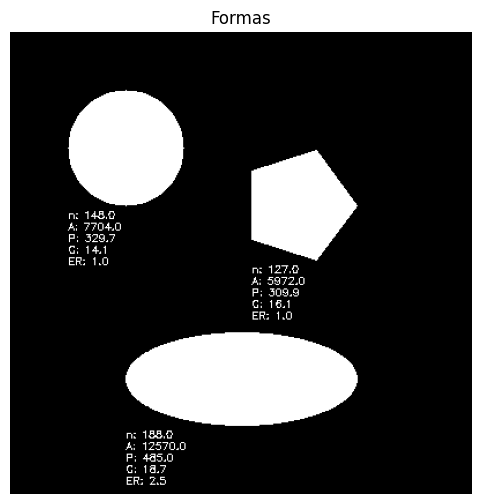

In [44]:
#Creación de polígono regular
def poligono_regular(image, ctr, radio, lados, color):
    pts = []
    ang_step = 2 * np.pi / lados
    for i in range(lados):
        ang = i * ang_step
        x = int(ctr[0] + radio * np.cos(ang))
        y = int(ctr[1] + radio * np.sin(ang))
        pts.append((x, y))
    pts = np.array(pts, np.int32)
    
    #regorganiza
    pts = pts.reshape((-1, 1, 2))
    cv2.fillPoly(image, [pts], color=color)

# Imagen vacía
img = np.zeros((400, 400, 1), dtype="uint8")
color = (255, 255, 255)

# Formas básicas
cv2.circle(img, (100, 100), 50, color, -1)  # Circular
poligono_regular(img, (250, 150), 50, 5, color)  # Polígono regular
cv2.ellipse(img, (200, 300), (100, 40), 0, 0, 360, color, -1)  # Elíptica

# Localiza contornos
contours, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Parámeros texto
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.3
thickness = 1

# Process each contour to calculate compactness and ellipse ratio (if possible)
for c in contours:
    # Puntos del contorno
    clon = len(c)

    # Área y perímetro
    area = cv2.contourArea(c)
    perimetro = cv2.arcLength(c, True)

    #Contenedor alineado con ejes de la imagen
    x,y,w,h = cv2.boundingRect(c)
    
    # Compactness: 4*pi*Area/Perimeter^2
    if perimetro > 0:
        compacidad = (perimetro ** 2) / area
    else:
        compactness = 0
    
    # Ajusta elipse si hay suficientes puntos
    if clon >= 5:
        elipse = cv2.fitEllipse(c)
        (center, axes, orientation) = elipse
        major_axis = max(axes)
        minor_axis = min(axes)
        elipse_ratio = major_axis / minor_axis
    else:
        elipse_ratio = None
    
    # Muestra valores en imageb
    cv2.putText(img, f"n: {clon:.1f}", (x, int(y+h+10)), font, font_scale, (255, 255, 255), thickness)
    cv2.putText(img, f"A: {area:.1f}", (x, int(y+h+20)), font, font_scale, (255, 255, 255), thickness)
    cv2.putText(img, f"P: {perimetro:.1f}", (x, int(y+h+30)), font, font_scale, color, thickness)
    cv2.putText(img, f"C: {compacidad:.1f}", (x, int(y+h+40)), font, font_scale, color, thickness)
    cv2.putText(img, f"ER: {elipse_ratio:.1f}", (x, int(y+h+50)), font, font_scale, color, thickness)
    
# Visualiza la imagen
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Formas")
plt.axis('off')
plt.show()


TAREA: Captura una o varias imágenes con monedas no solapadas. Tras visualizar la imagen, identifica de forma interactiva (por ejemplo haciendo clic en la imagen) una moneda de un valor determinado en la imagen (por ejemplo de 1€). Tras ello, la tarea se resuelve mostrando por pantalla el número de monedas y la cantidad de dinero presentes en la imagen. No hay restricciones sobre utilizar medidas geométricas o de color. ¿Qué problemas han observado?

Nota: Para establecer la correspondencia entre píxeles y milímetros, comentar que la moneda de un euro tiene un diámetro de 23.25 mm. la de 50 céntimos de 24.35, la de 20 céntimos de 22.25, etc. 

Extras: Considerar que la imagen pueda contener objetos que no son monedas y/o haya solape entre las monedas. Demo en vivo.



In [3]:
# https://mcazarez.medium.com/interactive-image-coordinate-display-using-opencv-in-python-2779cd45d191

img = cv2.imread('Monedas.jpg') 
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img_gray = cv2.GaussianBlur(img_gray,(5,5),0)

umbral = 200 # Prueba varios comenzando en 130

# Umbralizado binario invertido, dado que por defecto se asume objetos en blanco
th1, img_th1 = cv2.threshold(
    img_gray, # imagen
    umbral, # umbral
    255, # valor máximo
    cv2.THRESH_BINARY_INV # método
)

# Diameters of the coins in millimeters
DIAMETER_1_CENT = 16.26
DIAMETER_2_CENTS = 18.75
DIAMETER_5_CENTS = 21.25
DIAMETER_10_CENTS = 19.75
DIAMETER_20_CENTS = 22.25
DIAMETER_50_CENTS = 24.25
DIAMETER_1_EURO = 23.25
DIAMETER_2_EUROS = 25.75

# Localiza Círculos
circ = cv2.HoughCircles(
        img_gray,  # imagen 
        cv2.HOUGH_GRADIENT,  # tipo de detección
        1, # resolución
        100,  # distancia mínima entre círculos
        param1=100, # valor del gradiente
        param2=50, # umbral acumulador
        minRadius=50,  # radio mínimo
        maxRadius=150,  # radio máximo
    )

#Dibuja sobre entrada e imagen vacía
img_cont = np.zeros(img_rgb.shape)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

for det in circ[0]:
    x_coor, y_coor, det_radio = det # det is a tuple
    cv2.circle(
        img_rgb, # imagen
        (int(x_coor), int(y_coor)), # centro
        int(det_radio), # radio
        (0, 255, 0), # color
        2 # grosor
    )

# Function to find the closest contour to the clicked point
def find_closest_contour(contours, x, y):
    min_dist = float('inf')
    closest_contour = None
    for contour in contours:
        for point in contour:
            dist = cv2.norm(
                (int(x), int(y)), # punto
                (int(point[0][0]), int(point[0][1])), # contorno as a tuple of integers
                cv2.NORM_L2 # specify the norm type
            )
            if dist < min_dist:
                min_dist = dist
                closest_contour = contour
    return closest_contour

# Mouse callback function
def click_event(event, x, y, flags, params):
    if event == cv2.EVENT_LBUTTONDOWN:
        closest_contour = find_closest_contour(contours, x, y)
        if closest_contour is not None:
            area = cv2.contourArea(closest_contour)
            perimeter = cv2.arcLength(closest_contour, True)
            
            # Calculate the mean color within the contour
            mask = np.zeros(img_rgb.shape[:2], dtype=np.uint8)
            cv2.drawContours(mask, [closest_contour], -1, 255, -1)
            mean_val = cv2.mean(img_rgb, mask=mask)
            
            print(f'Reference Coin - Area: {area}, Perimeter: {perimeter}, Mean Color: {mean_val}')
            # Save or use the contour information as needed

# Find contours in the thresholded image
contours, _ = cv2.findContours(img_th1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Display the image and set the mouse callback
cv2.imshow('image', img_rgb)
cv2.setMouseCallback('image', click_event)

cv2.waitKey(0)
cv2.destroyAllWindows()

2024-10-10 17:37:33.497 python[28167:3029127] +[IMKClient subclass]: chose IMKClient_Legacy
2024-10-10 17:37:33.497 python[28167:3029127] +[IMKInputSession subclass]: chose IMKInputSession_Legacy


Reference Coin - Area: 33822.0, Perimeter: 688.2396776676178, Mean Color: (191.03567136618108, 180.2239645924319, 134.68147844183252, 0.0)
Reference Coin - Area: 29432.5, Perimeter: 645.369619011879, Mean Color: (174.365870077415, 156.96088858970043, 82.93611578593065, 0.0)
Reference Coin - Area: 29432.5, Perimeter: 645.369619011879, Mean Color: (174.365870077415, 156.96088858970043, 82.93611578593065, 0.0)
Reference Coin - Area: 29432.5, Perimeter: 645.369619011879, Mean Color: (174.365870077415, 156.96088858970043, 82.93611578593065, 0.0)
Reference Coin - Area: 17984.0, Perimeter: 500.9015851020813, Mean Color: (195.39645035441507, 133.209571954503, 86.42271553382054, 0.0)
Reference Coin - Area: 24838.0, Perimeter: 596.1564161777496, Mean Color: (219.5609308998167, 190.09795170160197, 99.33290826492389, 0.0)
Reference Coin - Area: 29432.5, Perimeter: 645.369619011879, Mean Color: (174.365870077415, 156.96088858970043, 82.93611578593065, 0.0)
Reference Coin - Area: 26952.0, Perimeter:

: 

El mundo real es muy variado, las imágenes no siempre se capturan con unas condiciones de iluminación tan buenas o controladas. Ejemplo con aplicación de variantes de umbralizados ofrecidas por OpenCV.

Umbral escogido  197.0


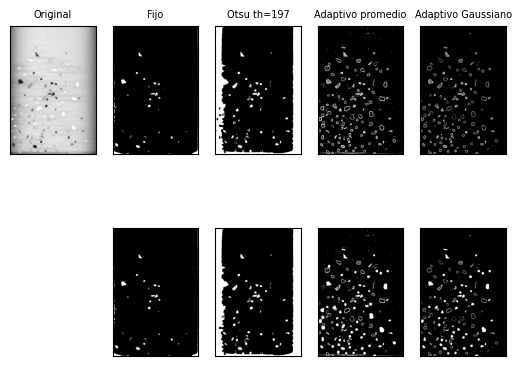

In [41]:
#Carga imagen directamente en grises
imgorig = cv2.imread('MPs.jpg', cv2.IMREAD_GRAYSCALE) 

img = cv2.GaussianBlur(imgorig,(5,5),0)

#Umbralizados
ret,imth1 = cv2.threshold(img,150,255,cv2.THRESH_BINARY_INV)
thotsu,imth2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
print('Umbral escogido ', thotsu)
imth3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
imth4 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
 
titles = ['Original', 'Fijo','Otsu th='+str(int(thotsu)),
            'Adaptivo promedio', 'Adaptivo Gaussiano']
images = [img, imth1, imth2, 255 - imth3, 255 - imth4]
 
for i in range(5):
    plt.subplot(2,5,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i], fontsize=7)
    plt.xticks([]),plt.yticks([])

    #Obtiene únicamente los contornos externos
    if i>0:
        res,imth = cv2.threshold(images[i],120,255,cv2.THRESH_BINARY)
        contornos, hierarchy= cv2.findContours(imth, 
        cv2.RETR_EXTERNAL , 
        cv2.CHAIN_APPROX_SIMPLE)  
        img_cont = np.zeros(img.shape)
        cv2.drawContours(img_cont, contornos, -1, (255,255,255), -1)  
        plt.subplot(2,5,i+6),plt.imshow(img_cont,'gray')
        plt.xticks([]),plt.yticks([])
plt.show()

Clasificación de microplásticos

In [ ]:
#Cargamos tres subimágenes de cada uno de los tres tipos considerados (el alquitrán no es microplástico)
imgF = cv2.imread('FRA.png') 
imgP = cv2.imread('PEL.png') 
imgT = cv2.imread('TAR.png') 

#Mostramos
plt.subplot(131)
plt.axis("off")
plt.imshow(imgF) 
plt.title('Fragmentos')
plt.subplot(132)
plt.axis("off")
plt.imshow(imgP) 
plt.title('Pellet')
plt.subplot(133)
plt.axis("off")
plt.imshow(imgT) 
plt.title('Alquitrán')

El objetivo de la siguiente tarea, descrita más abajo, es desarrollar tu propio clasificador basado únicamente en heurísticas desde características geométricas y/o de apariencia, para distinguir en las imágenes completas, las partículas de cada tipo, debiendo mostrar la bondad del clasificador haciendo uso de métricas para ello. La siguiente celda obtiene varias métricas para un conjunto de datos imaginario (y con etiquetas aleatorias). Si bien las trataremos con más detalle en teoría, muestro un repertorio de ellas, dando más peso a la matriz de confusión. La ejecución de la celda requiere instalar el paquete scikit-learn.

¿Qué es una matriz de confusión?
Se utiliza para mostrar el comportamiento de un clasificador para las distintas clases conocidas, se relacionan las etiquetas de las muestras anotadas frente a las predichas por el clasificador. Se busca una matriz diagonal, pero la perfección es infrecuente.

El siguiente ejemplo, muestra el modo de obtener la matriz de confusión para un hipotético problema con cuatro clases, y valores de anotación (variable y) y predicción (variable y_pred) obtenidos de forma aleatoria.

In [47]:

import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)


# Numero de muestras
n = 100  
nclases = 4

# A falta de clasificador y conjunto de datos, creamos anotaciones y predicciones de forma aleatoria
# Vector aleatorio con etiquetas anotadas
y = [random.randint(0, nclases - 1) for _ in range(n)]
print('Anotaciones ' , y)

# Vector aleatorio con etiquetas predichas por un supuesto clasificador
y_pred = [random.randint(0, nclases - 1) for _ in range(n)]
print('Predicciones ' , y_pred)

print('¿Cómo de bien encajan anotación y predicción?')

#Cálculo de métricas
accuracy = accuracy_score(y, y_pred)
#Para más de una clase se define la forma de promediar
precision = precision_score(y, y_pred,average='weighted')
recall = recall_score(y, y_pred,average='weighted')
f1score = f1_score(y, y_pred,average='weighted')

print(f"Accuracy (TP/(n))= {accuracy}")
print(f"Precision (TP/(TP+FP)) = {precision}")
print(f"Recall (TP/(TP+FN)) = {recall}")
print(f"F1 Score (2*(precision*recall)/(precision+recall)) = {f1score}")


conf_matrix = confusion_matrix(y, y_pred)
plt.figure(figsize=(8,8))
sns.set(font_scale = 1.75)#tamaños tipografía
sns.set(font_scale = 3.0)

ax = sns.heatmap(
        conf_matrix, # confusion matrix 2D array 
        annot=True, # Muestra números en las celdas
        fmt='d', # valores enteros
        cbar=False, # sin barra de colores
        cmap='flag', # mapa de colores
        #vmax=175 # contraste de color
    )

#Etiquetas matriz de confusión
label_font = {'size':'25'}
ax.set_xlabel("Predicha", labelpad=-0.75, fontdict=label_font)
ax.set_ylabel("Real/Anotado", labelpad=20, fontdict=label_font)

: 

TAREA: Las tres imágenes cargadas en la celda inicial, han sido extraidas de las imágenes de mayor tamaño presentes en la carpeta. La tarea consiste en extraer características (geométricas y/o visuales) e identificar patrones que permitan distinguir las partículas de cada una de las tres clases, evaluando los aciertos y fallos con las imágenes completas considerando las métricas mostradas y la matriz de confusión. La matriz de confusión, muestra para cada clase el número de muestras que se clasifican correctamente de dicha clase, y el número de muestras que se clasifican incorrectamente por cada una de las otras dos clases.

En el trabajo [SMACC: A System for Microplastics Automatic Counting and Classification](https://doi.org/10.1109/ACCESS.2020.2970498), las características geométricas utilizadas fueron:

- Área en píxeles
- Perímetro en píxeles
- Compacidad (relación entre el cuadrado del perímetro y el área de la partícula)
- Relación del área de la partícula con la del contenedor
- Relación del ancho y el alto del contenedor
- Relación entre los ejes de la elipse ajustada
- Definido el centroide, relación entre las distancias menor y mayor al contorno

Si no se quedan satisfechos con la segmentación obtenida, es el mundo real, también en el README comento técnicas recientes de segmentación, que podrían despertar su curiosidad.

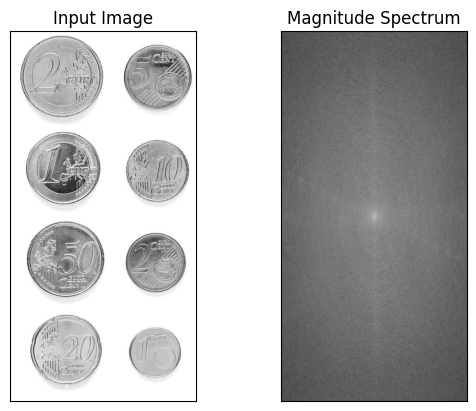

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
img = cv2.imread('Monedas.jpg', 0)  # Read as grayscale

# Compute the 2D Fourier Transform
f_transform = np.fft.fft2(img)
f_shift = np.fft.fftshift(f_transform)

# Compute the magnitude spectrum
magnitude_spectrum = 20 * np.log(np.abs(f_shift))

# Display the results
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

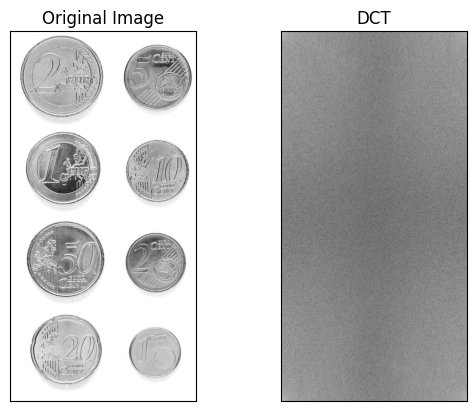

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def dct2(a):
    return np.fft.fft2(a, norm='ortho').real

def idct2(a):
    return np.fft.ifft2(a, norm='ortho').real

# Read image
img = cv2.imread('Monedas.jpg', 0)  # Read as grayscale
img = img.astype(float) / 255.0  # Normalize to [0, 1]

# Compute DCT
dct = dct2(img)

# Display original and DCT
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(np.log(abs(dct)), cmap='gray')
plt.title('DCT'), plt.xticks([]), plt.yticks([])
plt.show()

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Classification Report:
              precision    recall  f1-score   support

    Fragment       0.33      0.33      0.33         3
      Pellet       0.00      0.00      0.00         4
         Tar       0.56      0.56      0.56         9

    accuracy                           0.38        16
   macro avg       0.30      0.30      0.30        16
weighted avg       0.38      0.38      0.38        16



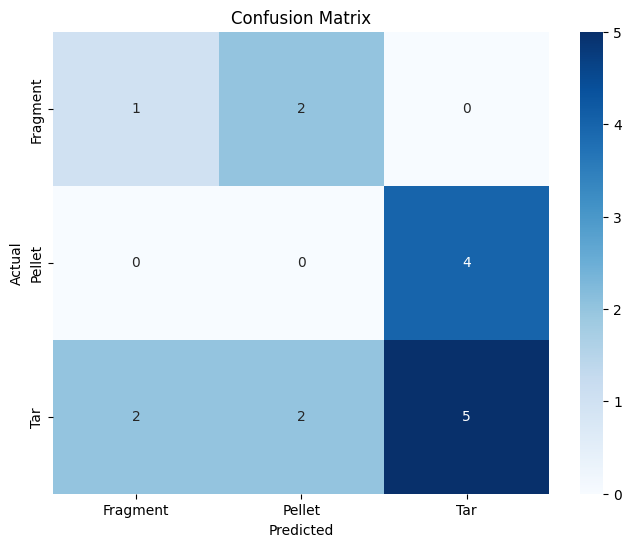

In [3]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Initialize lists to hold data and labels
data = []
labels = []

# List of image files and corresponding labels
image_files = ['FRA.png', 'PEL.png', 'TAR.png']
image_labels = ['Fragment', 'Pellet', 'Tar']

# Loop over the images
for idx, file in enumerate(image_files):
    # Load the image
    image = cv2.imread(file)
    if image is None:
        print(f"Error loading image {file}")
        continue

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian Blur to reduce noise
    blur = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply adaptive thresholding
    thresh = cv2.adaptiveThreshold(
        blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY_INV, 11, 2
    )

    # Remove small noise with morphological operations
    kernel = np.ones((3, 3), np.uint8)
    opening = cv2.morphologyEx(
        thresh, cv2.MORPH_OPEN, kernel, iterations=2
    )

    # Find contours
    contours, hierarchy = cv2.findContours(
        opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )

    # Loop over the contours
    for cnt in contours:
        # Filter by area (ignore very small particles)
        area = cv2.contourArea(cnt)
        if area > 20:  # Adjust threshold as needed
            # Compute perimeter
            perimeter = cv2.arcLength(cnt, True)

            # Compactness
            compactness = (perimeter ** 2) / area if area != 0 else 0

            # Bounding rectangle
            x, y, w, h = cv2.boundingRect(cnt)
            aspect_ratio = float(w) / h if h != 0 else 0
            area_rect_ratio = area / (w * h) if (w * h) != 0 else 0

            # Fit ellipse if possible
            if len(cnt) >= 5:
                ellipse = cv2.fitEllipse(cnt)
                (center, axes, orientation) = ellipse
                major_axis = max(axes)
                minor_axis = min(axes)
                ellipse_axis_ratio = minor_axis / major_axis if major_axis != 0 else 0
            else:
                ellipse_axis_ratio = 0

            # Centroid and distances
            M = cv2.moments(cnt)
            if M['m00'] != 0:
                cx = int(M['m10'] / M['m00'])
                cy = int(M['m01'] / M['m00'])
                # Calculate distances from centroid to contour points
                distances = [cv2.pointPolygonTest(cnt, (cx, cy), True) for point in cnt]
                max_dist = np.max(distances)
                min_dist = np.min(distances)
                dist_ratio = min_dist / max_dist if max_dist != 0 else 0
            else:
                dist_ratio = 0

            # Collect features
            features = [
                area, perimeter, compactness,
                area_rect_ratio, aspect_ratio,
                ellipse_axis_ratio, dist_ratio
            ]
            data.append(features)
            labels.append(image_labels[idx])

# Create a DataFrame
df = pd.DataFrame(data, columns=[
    'Area', 'Perimeter', 'Compactness',
    'Area_Rect_Ratio', 'Aspect_Ratio',
    'Ellipse_Axis_Ratio', 'Dist_Ratio'
])
df['Label'] = labels

# Prepare data for training
X = df.drop('Label', axis=1)
y = df['Label']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Train a Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm, annot=True, fmt='d',
    xticklabels=clf.classes_, yticklabels=clf.classes_,
    cmap='Blues'
)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [5]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Initialize lists to hold data and labels
data = []
labels = []

# List of image files and corresponding labels
image_files = ['FRA.png', 'PEL.png', 'TAR.png']
image_labels = ['Fragment', 'Pellet', 'Tar']

# Loop over the images
for idx, file in enumerate(image_files):
    # Load the image
    image = cv2.imread(file)
    if image is None:
        print(f"Error loading image {file}")
        continue

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian Blur to reduce noise
    blur = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply adaptive thresholding
    thresh = cv2.adaptiveThreshold(
        blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY_INV, 11, 2
    )

    # Remove small noise with morphological operations
    kernel = np.ones((3, 3), np.uint8)
    opening = cv2.morphologyEx(
        thresh, cv2.MORPH_OPEN, kernel, iterations=2
    )

    # Find contours
    contours, hierarchy = cv2.findContours(
        opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )

    # Loop over the contours
    for cnt in contours:
        # Filter by area (ignore very small particles)
        area = cv2.contourArea(cnt)
        if area > 5:  # Lowered threshold
            # Compute perimeter
            perimeter = cv2.arcLength(cnt, True)

            # Compactness
            compactness = (perimeter ** 2) / area if area != 0 else 0

            # Bounding rectangle
            x, y, w, h = cv2.boundingRect(cnt)
            aspect_ratio = float(w) / h if h != 0 else 0
            area_rect_ratio = area / (w * h) if (w * h) != 0 else 0

            # Fit ellipse if possible
            if len(cnt) >= 5:
                ellipse = cv2.fitEllipse(cnt)
                (center, axes, orientation) = ellipse
                major_axis = max(axes)
                minor_axis = min(axes)
                ellipse_axis_ratio = minor_axis / major_axis if major_axis != 0 else 0
            else:
                ellipse_axis_ratio = 0

            # Centroid and distances
            M = cv2.moments(cnt)
            if M['m00'] != 0:
                cx = int(M['m10'] / M['m00'])
                cy = int(M['m01'] / M['m00'])
                # Calculate distances from centroid to contour points
                distances = [cv2.pointPolygonTest(cnt, (cx, cy), True) for point in cnt]
                max_dist = np.max(distances)
                min_dist = np.min(distances)
                dist_ratio = min_dist / max_dist if max_dist != 0 else 0
            else:
                dist_ratio = 0

            # **New Features:**

            # Solidity
            hull_area = cv2.contourArea(cv2.convexHull(cnt))
            solidity = area / hull_area if hull_area != 0 else 0

            # Equivalent Diameter
            equi_diameter = np.sqrt(4 * area / np.pi)

            # Extent
            extent = area / (w * h) if (w * h) != 0 else 0

            # Hu Moments (shape descriptors)
            hu_moments = cv2.HuMoments(M).flatten()

            # **Color Features:**
            mask = np.zeros(gray.shape, np.uint8)
            cv2.drawContours(mask, [cnt], -1, 255, -1)
            mean_val = cv2.mean(image, mask=mask)

            # Collect features
            features = [
                area, perimeter, compactness,
                area_rect_ratio, aspect_ratio,
                ellipse_axis_ratio, dist_ratio,
                solidity, equi_diameter, extent,
                mean_val[0], mean_val[1], mean_val[2],  # Color channels
                *hu_moments  # Unpack Hu Moments
            ]
            data.append(features)
            labels.append(image_labels[idx])

# Create a DataFrame
feature_names = [
    'Area', 'Perimeter', 'Compactness',
    'Area_Rect_Ratio', 'Aspect_Ratio',
    'Ellipse_Axis_Ratio', 'Dist_Ratio',
    'Solidity', 'Equi_Diameter', 'Extent',
    'Mean_R', 'Mean_G', 'Mean_B',
    'Hu1', 'Hu2', 'Hu3', 'Hu4', 'Hu5', 'Hu6', 'Hu7'
]
df = pd.DataFrame(data, columns=feature_names)
df['Label'] = labels

# Show the DataFrame
print(df.head())


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


   Area  Perimeter  Compactness  Area_Rect_Ratio  Aspect_Ratio  \
0  16.0  16.000000    16.000000         0.640000      1.000000   
1  16.0  16.000000    16.000000         0.640000      1.000000   
2  34.5  23.414214    15.890591         0.704082      1.000000   
3  30.0  22.828427    17.371236         0.625000      1.333333   
4  16.0  16.000000    16.000000         0.640000      1.000000   

   Ellipse_Axis_Ratio  Dist_Ratio  Solidity  Equi_Diameter    Extent  ...  \
0            0.000000         1.0  1.000000       4.513517  0.640000  ...   
1            0.000000         1.0  1.000000       4.513517  0.640000  ...   
2            0.702385         1.0  0.985714       6.627727  0.704082  ...   
3            0.401022         1.0  0.937500       6.180387  0.625000  ...   
4            0.000000         1.0  1.000000       4.513517  0.640000  ...   

       Mean_G      Mean_B       Hu1       Hu2           Hu3           Hu4  \
0  118.200000  119.440000  0.166667  0.000000  2.286122e-17  4.

Classification Report:
              precision    recall  f1-score   support

    Fragment       1.00      1.00      1.00        11
      Pellet       0.91      0.91      0.91        11
         Tar       0.91      0.91      0.91        11

    accuracy                           0.94        33
   macro avg       0.94      0.94      0.94        33
weighted avg       0.94      0.94      0.94        33



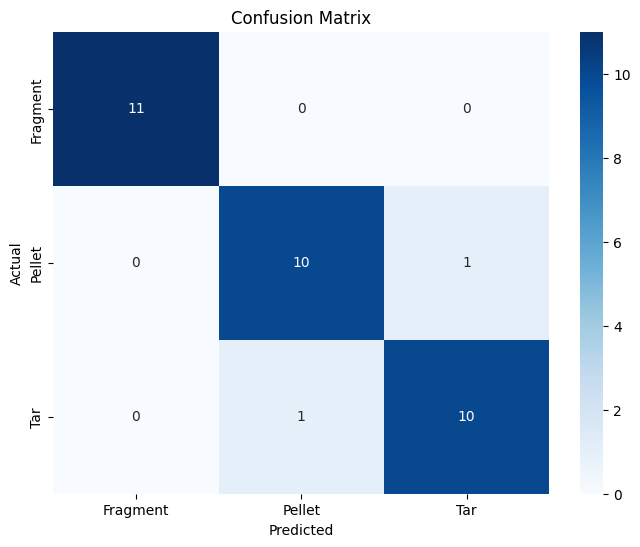

In [6]:
# Separate each class
df_fragment = df[df['Label'] == 'Fragment']
df_pellet = df[df['Label'] == 'Pellet']
df_tar = df[df['Label'] == 'Tar']

# Find the maximum class count
max_count = max(len(df_fragment), len(df_pellet), len(df_tar))

# Upsample minority classes
df_fragment_upsampled = resample(
    df_fragment,
    replace=True,
    n_samples=max_count,
    random_state=42
)
df_pellet_upsampled = resample(
    df_pellet,
    replace=True,
    n_samples=max_count,
    random_state=42
)
df_tar_upsampled = df_tar  # Majority class

# Combine upsampled data
df_balanced = pd.concat([df_fragment_upsampled, df_pellet_upsampled, df_tar_upsampled])

# Shuffle the dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Prepare data for training
X = df_balanced.drop('Label', axis=1)
y = df_balanced['Label']

# **Feature Scaling**
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# **Model Selection and Hyperparameter Tuning**
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

clf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='accuracy'
)

grid_search.fit(X_train, y_train)

# Best estimator
best_clf = grid_search.best_estimator_

# Predict on test set
y_pred = best_clf.predict(X_test)

# Evaluate the classifier
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=best_clf.classes_)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm, annot=True, fmt='d',
    xticklabels=best_clf.classes_, yticklabels=best_clf.classes_,
    cmap='Blues'
)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Feature Statistics:
                 Area                Perimeter             Compactness  \
                 mean          std        mean         std        mean   
Label                                                                    
Fragment    71.500000   105.000245   38.981831   41.259654   23.073028   
Pellet     807.145161  1466.799158  120.506346  105.029002   39.980144   
Tar       1868.545455  2590.109925  192.081423  151.619926   36.899151   

                    Aspect_Ratio           Ellipse_Axis_Ratio            \
                std         mean       std               mean       std   
Label                                                                     
Fragment  16.096728     1.269275  0.690341           0.326617  0.310314   
Pellet    37.600876     1.266892  1.098235           0.507686  0.328055   
Tar       45.823218     1.018282  0.133847           0.657157  0.265450   

              Mean_R                 Mean_G                 Mean_B             \
   

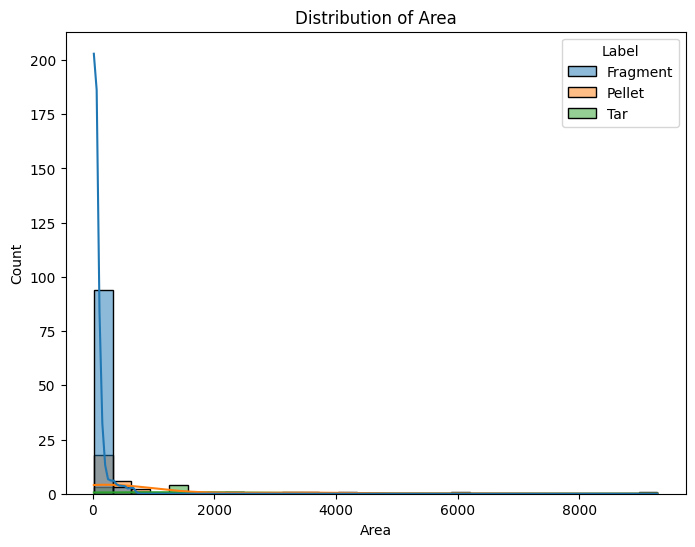

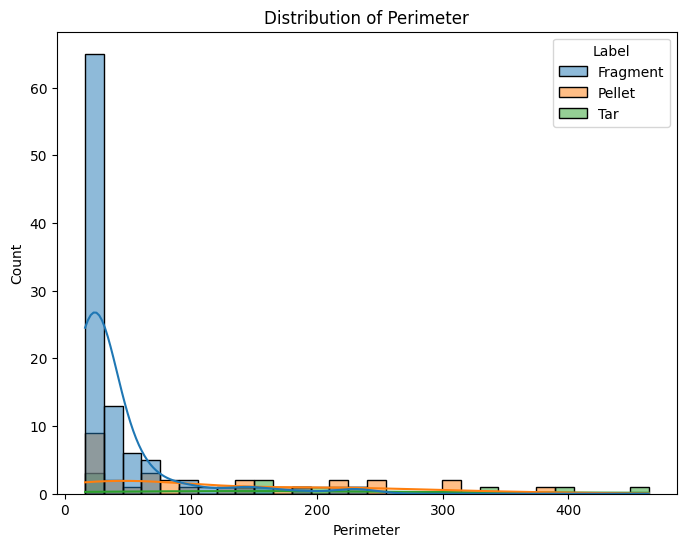

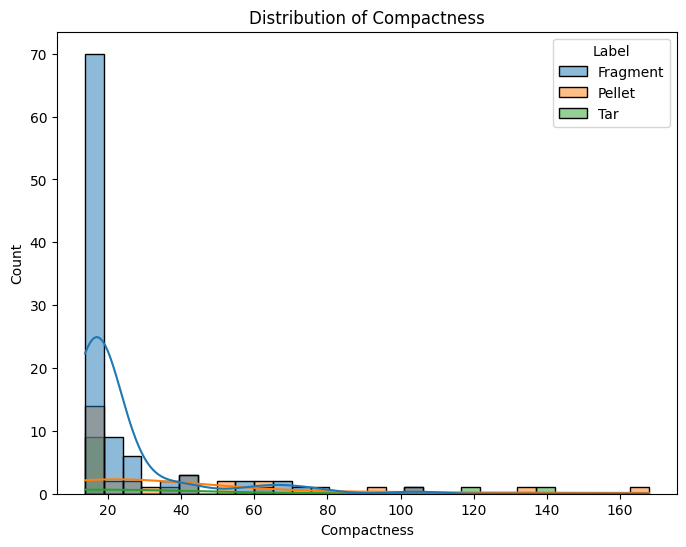

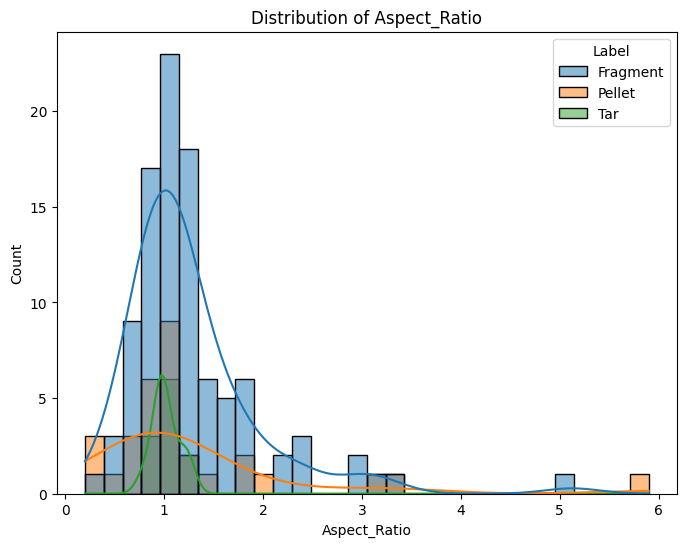

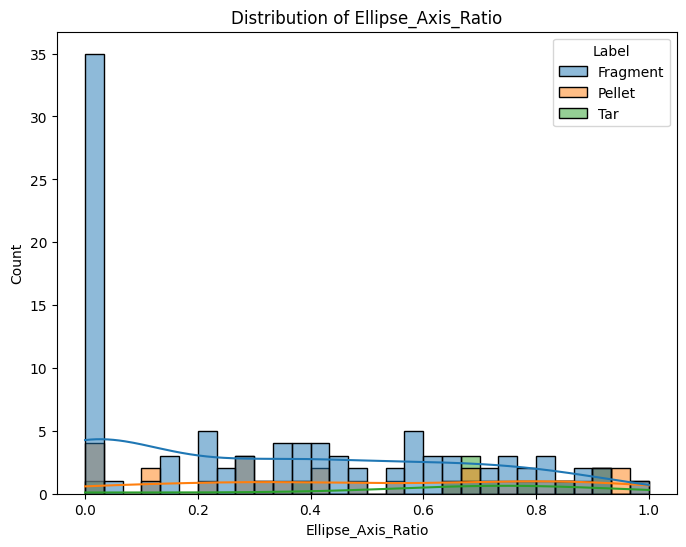

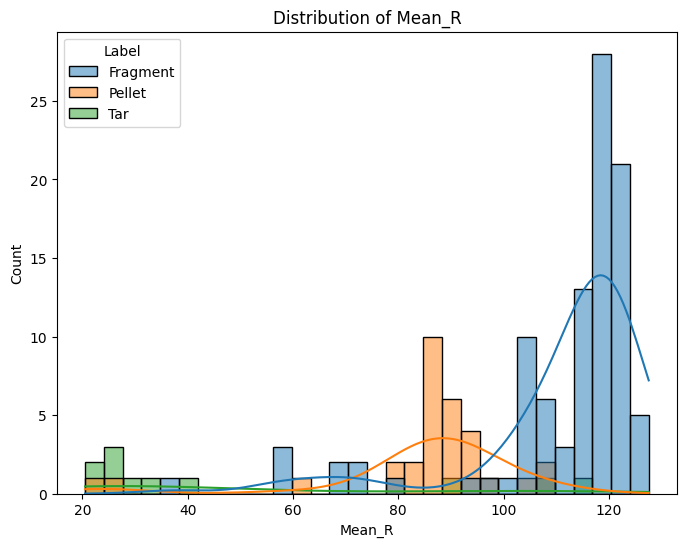

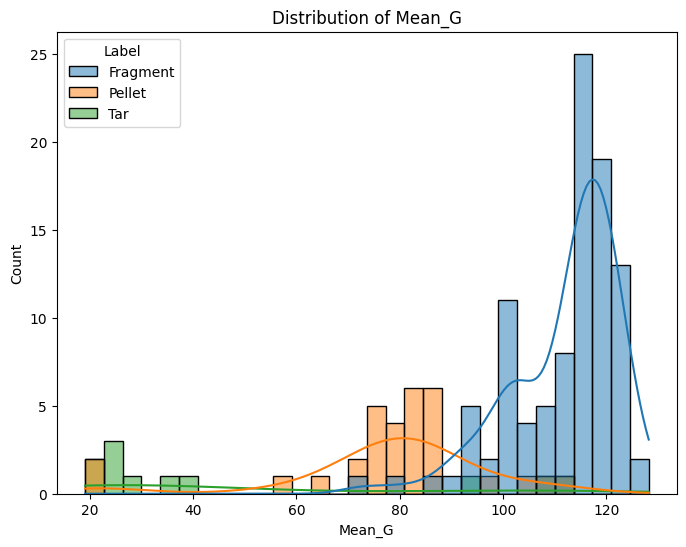

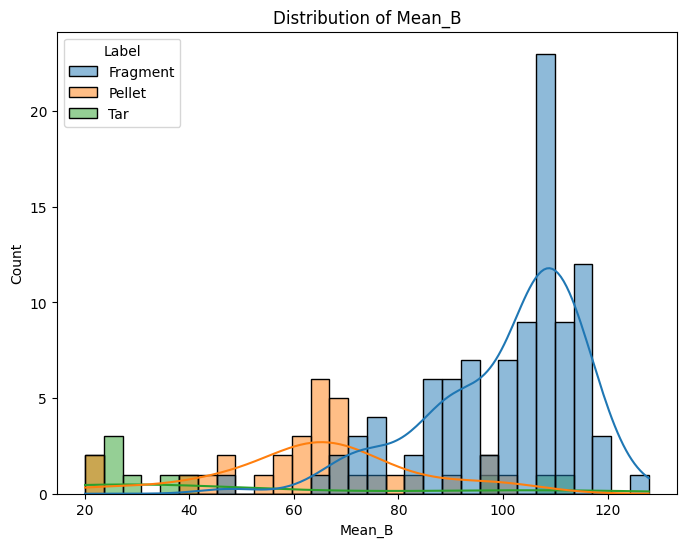

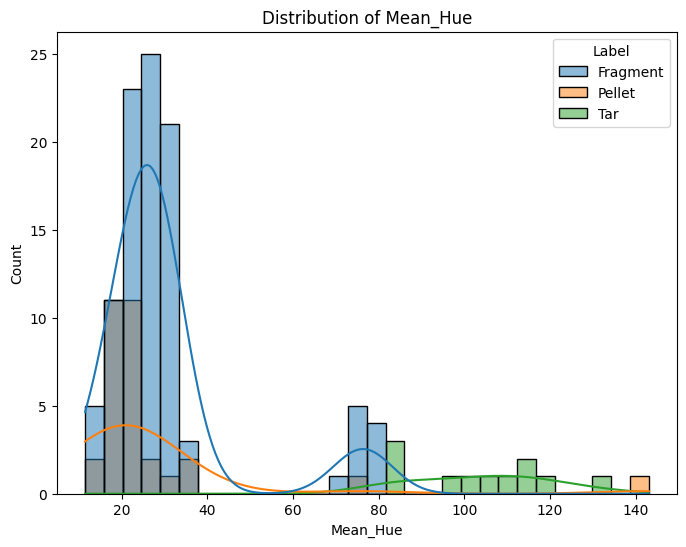

In [11]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize lists to hold data and labels
data = []
labels = []

# List of image files and corresponding labels
image_files = ['FRA.png', 'PEL.png', 'TAR.png']
image_labels = ['Fragment', 'Pellet', 'Tar']

# Loop over the images
for idx, file in enumerate(image_files):
    # Load the image
    image = cv2.imread(file)
    if image is None:
        print(f"Error loading image {file}")
        continue

    # Convert to grayscale for processing
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian Blur to reduce noise
    blur = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply adaptive thresholding
    thresh = cv2.adaptiveThreshold(
        blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
        cv2.THRESH_BINARY_INV, 11, 2
    )

    # Remove small noise with morphological operations
    kernel = np.ones((3, 3), np.uint8)
    opening = cv2.morphologyEx(
        thresh, cv2.MORPH_OPEN, kernel, iterations=2
    )

    # Find contours
    contours, hierarchy = cv2.findContours(
        opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )

    # Loop over the contours
    for cnt in contours:
        # Filter by area (ignore very small particles)
        area = cv2.contourArea(cnt)
        if area > 10:  # Adjust threshold as needed
            # Compute perimeter
            perimeter = cv2.arcLength(cnt, True)

            # Compactness
            compactness = (perimeter ** 2) / area if area != 0 else 0

            # Bounding rectangle
            x, y, w, h = cv2.boundingRect(cnt)
            aspect_ratio = float(w) / h if h != 0 else 0
            area_rect_ratio = area / (w * h) if (w * h) != 0 else 0

            # Fit ellipse if possible
            if len(cnt) >= 5:
                ellipse = cv2.fitEllipse(cnt)
                (center, axes, orientation) = ellipse
                major_axis = max(axes)
                minor_axis = min(axes)
                ellipse_axis_ratio = minor_axis / major_axis if major_axis != 0 else 0
            else:
                ellipse_axis_ratio = 0

            # Create a mask for the contour
            mask = np.zeros(image.shape[:2], dtype="uint8")
            cv2.drawContours(mask, [cnt], -1, 255, -1)

            # Calculate mean color within the contour mask
            mean_val = cv2.mean(image, mask=mask)
            mean_b = mean_val[0]  # Blue channel
            mean_g = mean_val[1]  # Green channel
            mean_r = mean_val[2]  # Red channel

            # Convert BGR to HSV and get mean hue
            hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
            mean_hsv = cv2.mean(hsv_image, mask=mask)
            mean_hue = mean_hsv[0]  # Hue channel

            # Collect features
            features = [
                area, perimeter, compactness,
                aspect_ratio, ellipse_axis_ratio,
                mean_r, mean_g, mean_b, mean_hue
            ]
            data.append(features)
            labels.append(image_labels[idx])

# Create a DataFrame
df = pd.DataFrame(data, columns=[
    'Area', 'Perimeter', 'Compactness',
    'Aspect_Ratio', 'Ellipse_Axis_Ratio',
    'Mean_R', 'Mean_G', 'Mean_B', 'Mean_Hue'
])
df['Label'] = labels

# Analyze the features
print("Feature Statistics:")
print(df.groupby('Label').agg(['mean', 'std']))

# Visualize feature distributions
features_to_plot = [
    'Area', 'Perimeter', 'Compactness',
    'Aspect_Ratio', 'Ellipse_Axis_Ratio',
    'Mean_R', 'Mean_G', 'Mean_B', 'Mean_Hue'
]

for feature in features_to_plot:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=feature, hue='Label', kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.show()

Confusion Matrix:
Predicted  Fragment  Pellet  Tar  Unknown
Actual                                   
Fragment         45       6    2       19
Pellet            2       5   15        6
Tar               1       0    8        1

Overall Accuracy: 52.73%

Classification Report:
              precision    recall  f1-score   support

    Fragment       0.94      0.62      0.75        72
      Pellet       0.45      0.18      0.26        28
         Tar       0.32      0.80      0.46        10
     Unknown       0.00      0.00      0.00         0

    accuracy                           0.53       110
   macro avg       0.43      0.40      0.37       110
weighted avg       0.76      0.53      0.60       110



/Users/franciscoj./anaconda3/envs/VC_P1/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/franciscoj./anaconda3/envs/VC_P1/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/franciscoj./anaconda3/envs/VC_P1/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

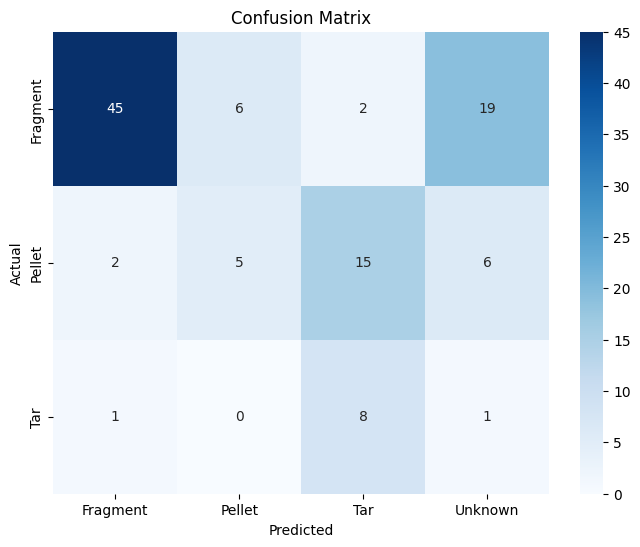

In [10]:
# Function to calculate mean brightness
def get_mean_brightness(r, g, b):
    # Calculate brightness as the mean of RGB values
    return (r + g + b) / 3

# Function to classify a particle based on features
def classify_particle(features, params):
    # Unpack features
    (area, perimeter, compactness, aspect_ratio, ellipse_axis_ratio,
     mean_r, mean_g, mean_b, mean_hue) = features

    # Calculate mean brightness
    mean_brightness = get_mean_brightness(mean_r, mean_g, mean_b)

    # Unpack parameters
    compactness_threshold = params['compactness_threshold']
    ellipse_axis_ratio_threshold = params['ellipse_axis_ratio_threshold']
    aspect_ratio_threshold = params['aspect_ratio_threshold']
    area_threshold = params['area_threshold']
    mean_hue_pellet_range = params['mean_hue_pellet_range']
    mean_brightness_fragment_threshold = params['mean_brightness_fragment_threshold']
    mean_brightness_tar_threshold = params['mean_brightness_tar_threshold']

    # Classification rules
    # Rule for Pellet: High compactness, high ellipse axis ratio, specific hue range
    if (compactness >= compactness_threshold and
        ellipse_axis_ratio >= ellipse_axis_ratio_threshold and
        mean_hue >= mean_hue_pellet_range[0] and
        mean_hue <= mean_hue_pellet_range[1]):
        return 'Pellet'
    # Rule for Tar: Low mean brightness (darker particles)
    elif mean_brightness <= mean_brightness_tar_threshold:
        return 'Tar'
    # Rule for Fragment: Remaining particles with higher brightness
    elif mean_brightness >= mean_brightness_fragment_threshold:
        return 'Fragment'
    else:
        return 'Unknown'

# Parameters for classification (adjustable)
params = {
    'compactness_threshold': 15.0,
    'ellipse_axis_ratio_threshold': 0.8,
    'aspect_ratio_threshold': 1.5,
    'area_threshold': 50.0,
    'mean_hue_pellet_range': (15, 45),  # Hue range for pellets
    'mean_brightness_fragment_threshold': 100,  # Bright fragments
    'mean_brightness_tar_threshold': 80  # Dark tar particles
}

# Apply the classifier to each particle
df['Predicted_Label'] = df.apply(lambda row: classify_particle(
    row[:-1].values, params), axis=1)

# Evaluate the classifier
conf_mat = pd.crosstab(df['Label'], df['Predicted_Label'], rownames=['Actual'], colnames=['Predicted'])

print("Confusion Matrix:")
print(conf_mat)

# Calculate accuracy
accuracy = np.mean(df['Label'] == df['Predicted_Label'])
print(f"\nOverall Accuracy: {accuracy * 100:.2f}%")

# Classification report
from sklearn.metrics import classification_report

print("\nClassification Report:")
print(classification_report(df['Label'], df['Predicted_Label']))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Feature Statistics:
               Area              Perimeter            Compactness             \
               mean         std       mean        std        mean        std   
Label                                                                          
Fragment  46.833333   27.299703  30.389375  11.485407   20.643864   6.490359   
Pellet    45.750000   25.297441  29.884062  12.714811   19.852968   6.131298   
Tar       99.200000  104.656060  50.978412  42.515482   27.349831  16.900481   

         Area_Rect_Ratio           Aspect_Ratio            ... Dist_Ratio  \
                    mean       std         mean       std  ...       mean   
Label                                                      ...              
Fragment        0.640683  0.108181     1.692937  0.723451  ...   0.866667   
Pellet          0.616203  0.107068     1.127162  0.495729  ...   1.000000   
Tar             0.546427  0.165414     1.155358  0.515427  ...   0.977778   

                       Mean_R       

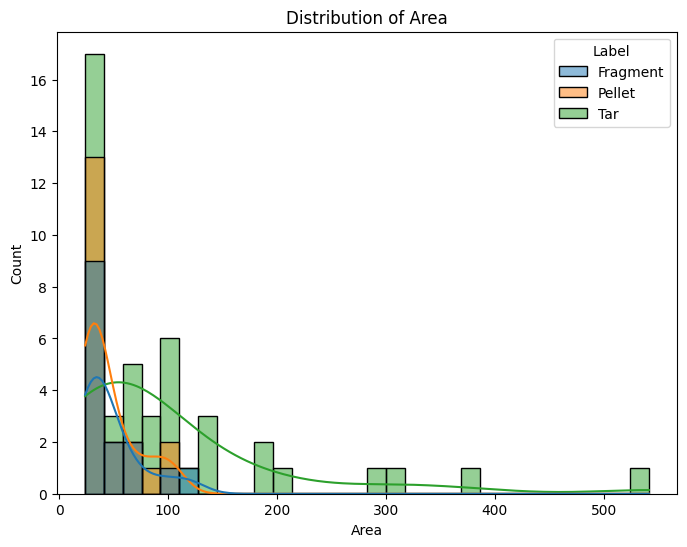

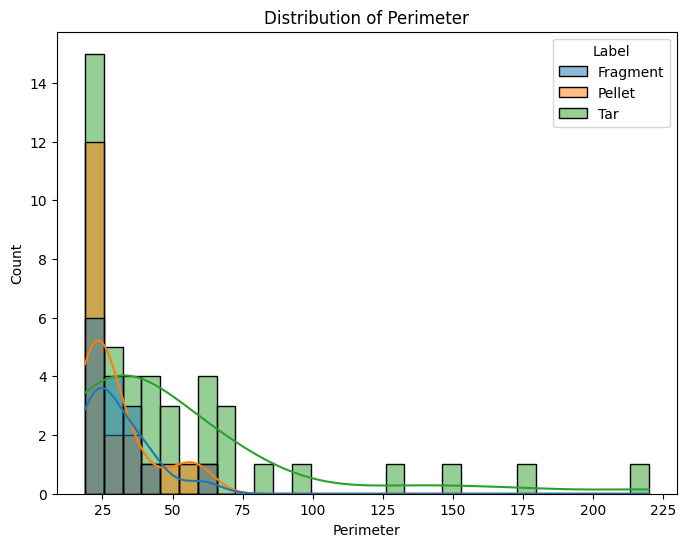

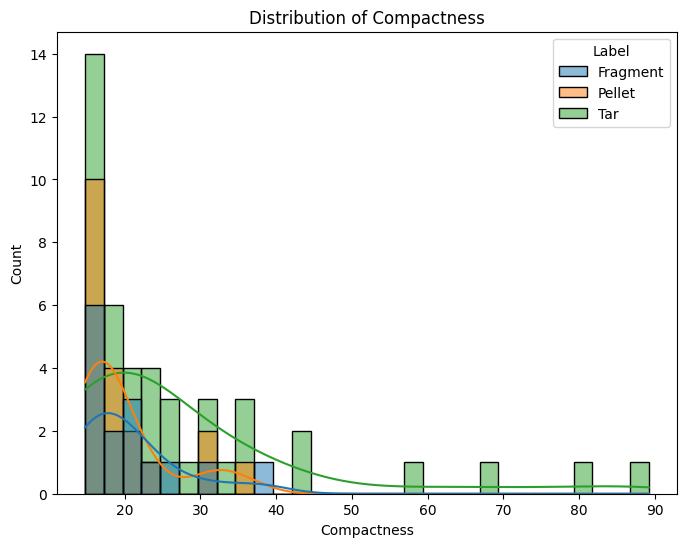

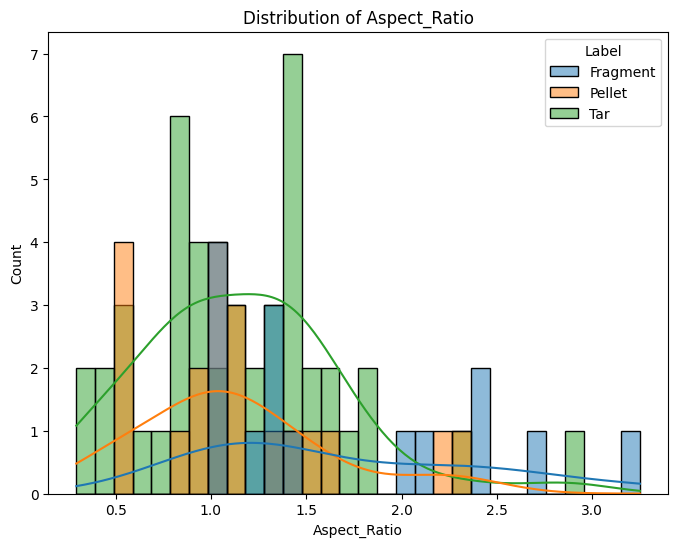

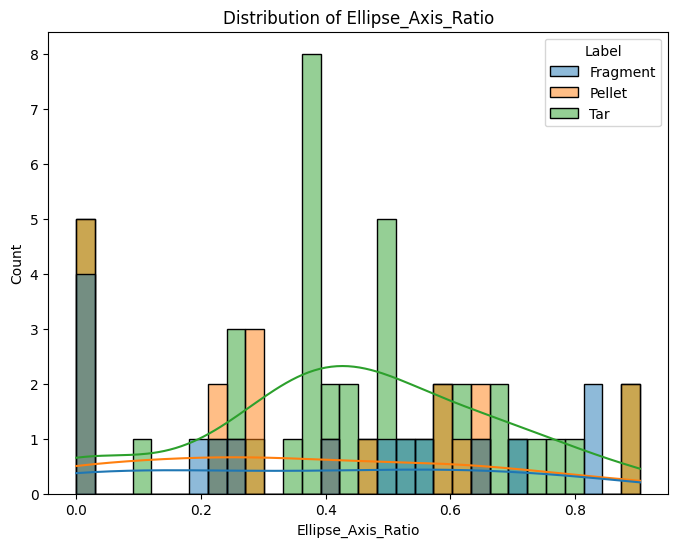

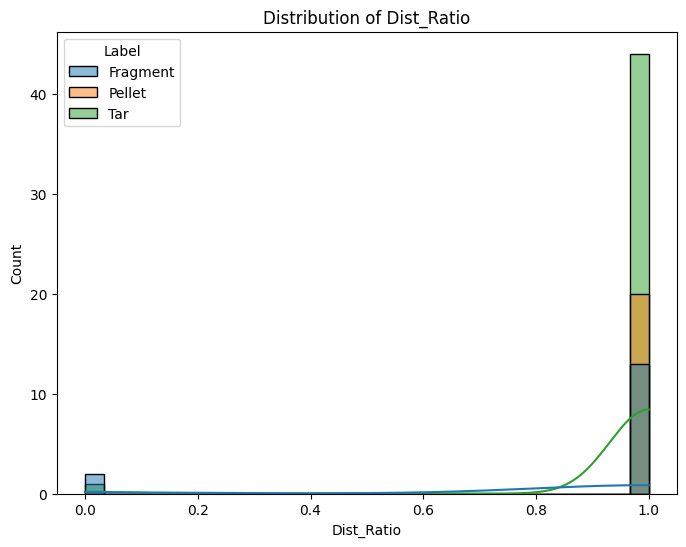

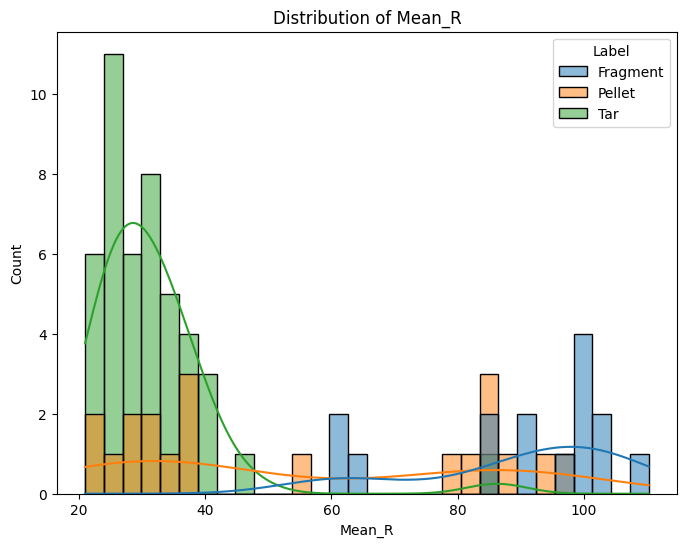

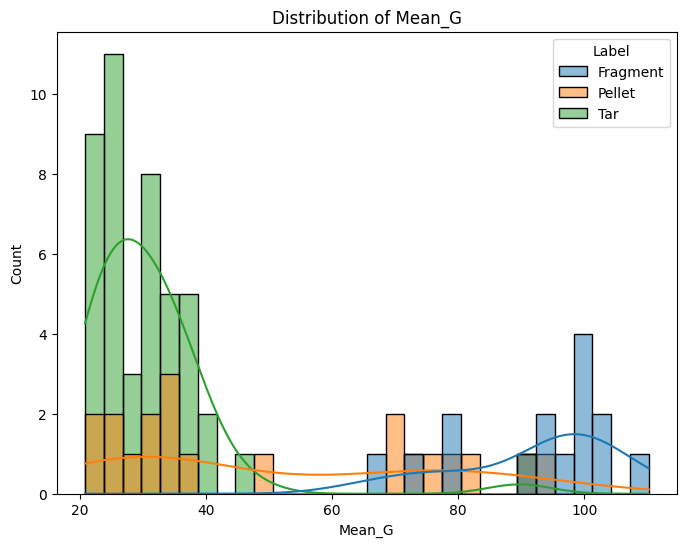

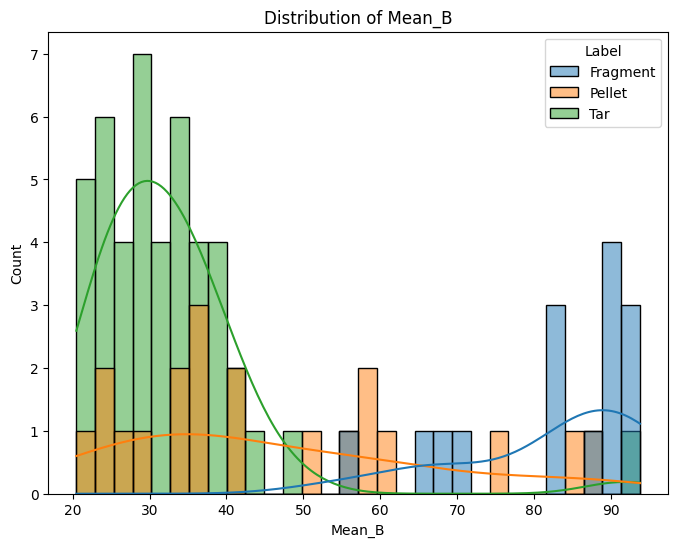

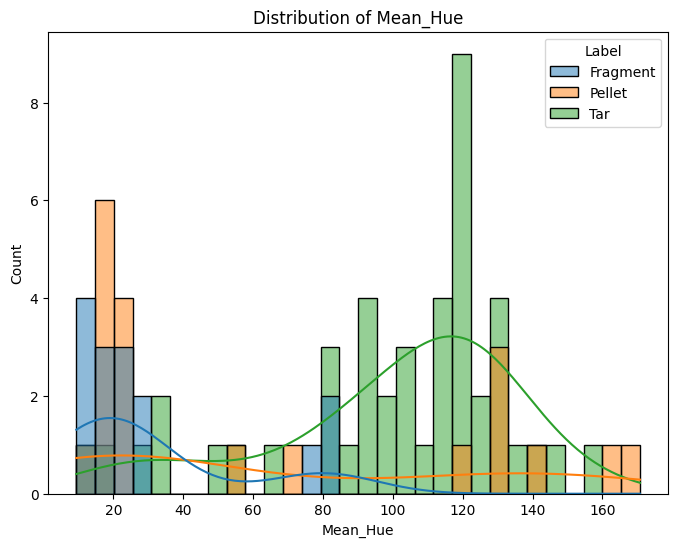

In [14]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize lists to hold data and labels
data = []
labels = []

# List of image files and corresponding labels
image_files = ['FRA.png', 'PEL.png', 'TAR.png']
image_labels = ['Fragment', 'Pellet', 'Tar']

# Loop over the images
for idx, file in enumerate(image_files):
    # Load the image
    image = cv2.imread(file)
    if image is None:
        print(f"Error loading image {file}")
        continue

    # Convert to grayscale for processing
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian Blur to reduce noise
    blur = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply adaptive thresholding
    thresh = cv2.adaptiveThreshold(
        blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY_INV, 11, 2
    )

    # Remove small noise with morphological operations
    kernel = np.ones((3, 3), np.uint8)
    opening = cv2.morphologyEx(
        thresh, cv2.MORPH_OPEN, kernel, iterations=2
    )

    # Find contours
    contours, hierarchy = cv2.findContours(
        opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )

    # Loop over the contours
    for cnt in contours:
        # Filter by area (ignore very small particles)
        area = cv2.contourArea(cnt)
        if area > 20:  # Adjust threshold as needed
            # Compute perimeter
            perimeter = cv2.arcLength(cnt, True)

            # Compactness
            compactness = (perimeter ** 2) / area if area != 0 else 0

            # Bounding rectangle
            x, y, w, h = cv2.boundingRect(cnt)
            aspect_ratio = float(w) / h if h != 0 else 0
            area_rect_ratio = area / (w * h) if (w * h) != 0 else 0

            # Fit ellipse if possible
            if len(cnt) >= 5:
                ellipse = cv2.fitEllipse(cnt)
                (center, axes, orientation) = ellipse
                major_axis = max(axes)
                minor_axis = min(axes)
                ellipse_axis_ratio = minor_axis / major_axis if major_axis != 0 else 0
            else:
                ellipse_axis_ratio = 0

            # Centroid and distances
            M = cv2.moments(cnt)
            if M['m00'] != 0:
                cx = int(M['m10'] / M['m00'])
                cy = int(M['m01'] / M['m00'])
                # Calculate distances from centroid to contour points
                distances = [cv2.pointPolygonTest(cnt, (cx, cy), True) for point in cnt]
                max_dist = np.max(distances)
                min_dist = np.min(distances)
                dist_ratio = min_dist / max_dist if max_dist != 0 else 0
            else:
                dist_ratio = 0

            # Create a mask for the contour
            mask = np.zeros(image.shape[:2], dtype="uint8")
            cv2.drawContours(mask, [cnt], -1, 255, -1)

            # Calculate mean color within the contour mask
            mean_val = cv2.mean(image, mask=mask)
            mean_b = mean_val[0]
            mean_g = mean_val[1]
            mean_r = mean_val[2]

            # Convert BGR to HSV and get mean hue
            hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
            mean_hsv = cv2.mean(hsv_image, mask=mask)
            mean_hue = mean_hsv[0]

            # Collect features
            features = [
                area, perimeter, compactness,
                area_rect_ratio, aspect_ratio,
                ellipse_axis_ratio, dist_ratio,
                mean_r, mean_g, mean_b, mean_hue
            ]
            data.append(features)
            labels.append(image_labels[idx])

# Create a DataFrame
df = pd.DataFrame(data, columns=[
    'Area', 'Perimeter', 'Compactness',
    'Area_Rect_Ratio', 'Aspect_Ratio',
    'Ellipse_Axis_Ratio', 'Dist_Ratio',
    'Mean_R', 'Mean_G', 'Mean_B', 'Mean_Hue'
])
df['Label'] = labels

# Analyze the features
print("Feature Statistics:")
print(df.groupby('Label').agg(['mean', 'std']))

# Optionally, plot histograms for each feature
features_to_plot = [
    'Area', 'Perimeter', 'Compactness',
    'Aspect_Ratio', 'Ellipse_Axis_Ratio', 'Dist_Ratio',
    'Mean_R', 'Mean_G', 'Mean_B', 'Mean_Hue'
]

for feature in features_to_plot:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=feature, hue='Label', kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.show()


Confusion Matrix:
Predicted  Pellet  Tar  Unknown
Actual                         
Fragment        0    4       11
Pellet          2   16        2
Tar             0   44        1

Overall Accuracy: 57.50%

Classification Report:
              precision    recall  f1-score   support

    Fragment       0.00      0.00      0.00        15
      Pellet       1.00      0.10      0.18        20
         Tar       0.69      0.98      0.81        45
     Unknown       0.00      0.00      0.00         0

    accuracy                           0.57        80
   macro avg       0.42      0.27      0.25        80
weighted avg       0.64      0.57      0.50        80



/Users/franciscoj./anaconda3/envs/VC_P1/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/franciscoj./anaconda3/envs/VC_P1/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/franciscoj./anaconda3/envs/VC_P1/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.ca

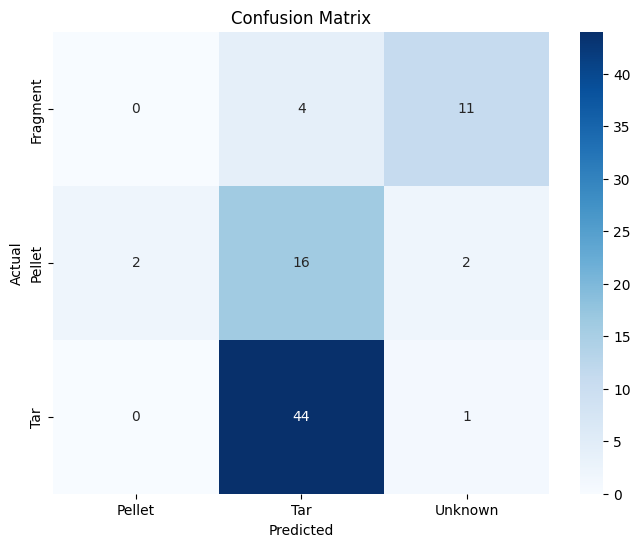

In [15]:
# Define classification parameters (thresholds)
params = {
    'compactness_pellet_threshold': 15.0,
    'ellipse_axis_ratio_pellet_threshold': 0.8,
    'mean_hue_pellet_range': (15, 45),  
    'mean_brightness_tar_threshold': 80,
    'mean_brightness_fragment_threshold': 100,
    'aspect_ratio_fragment_threshold': 1.5,
    'area_fragment_threshold': 50.0
}

# Function to calculate mean brightness
def get_mean_brightness(r, g, b):
    return (r + g + b) / 3

# Function to classify particles based on features and thresholds
def classify_particle(features, params):
    # Unpack features
    (area, perimeter, compactness,
     area_rect_ratio, aspect_ratio,
     ellipse_axis_ratio, dist_ratio,
     mean_r, mean_g, mean_b, mean_hue) = features

    # Calculate mean brightness
    mean_brightness = get_mean_brightness(mean_r, mean_g, mean_b)

    # Classification rules
    # Rule for Pellet: High compactness, high ellipse axis ratio, specific hue range
    if (compactness >= params['compactness_pellet_threshold'] and
        ellipse_axis_ratio >= params['ellipse_axis_ratio_pellet_threshold'] and
        params['mean_hue_pellet_range'][0] <= mean_hue <= params['mean_hue_pellet_range'][1]):
        return 'Pellet'
    # Rule for Tar: Low mean brightness (darker particles)
    elif mean_brightness <= params['mean_brightness_tar_threshold']:
        return 'Tar'
    # Rule for Fragment: Larger area, lower aspect ratio, higher brightness
    elif (area >= params['area_fragment_threshold'] and
          aspect_ratio <= params['aspect_ratio_fragment_threshold'] and
          mean_brightness >= params['mean_brightness_fragment_threshold']):
        return 'Fragment'
    else:
        return 'Unknown'

# Apply the classifier to each particle
df['Predicted_Label'] = df.apply(lambda row: classify_particle(row[:-1], params), axis=1)

# Evaluate the classifier
conf_mat = pd.crosstab(df['Label'], df['Predicted_Label'], rownames=['Actual'], colnames=['Predicted'])

print("Confusion Matrix:")
print(conf_mat)

# Calculate accuracy
accuracy = np.mean(df['Label'] == df['Predicted_Label'])
print(f"\nOverall Accuracy: {accuracy * 100:.2f}%")

# Classification report
from sklearn.metrics import classification_report

print("\nClassification Report:")
print(classification_report(df['Label'], df['Predicted_Label']))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
